# Submission Project Akhir ML Intermediate
* Nama : Ferdy Rizkiawan
* Email : ferdyrizkiawan@student.uns.ac.id
* ID Dicoding : ferdyrizz

## Beberapa hal yang dicapai:
Dataset : https://www.kaggle.com/datasets/muhammadkhalid/sign-language-for-numbers
1. Dataset memiliki lebih dari 10rb data
2. Resolusi gambar tidak seragam
3. Akurasi train dan val set > 92%
4. Mengimplementasikan callback
5. Terdapat Conv2D Maxpooling Layer pada VGG16


## Menyiapkan semua library yang dibutuhkan

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os, pathlib
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import Callback

## Gathering Data

In [2]:
!pip install kaggle --quiet

In [6]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers
!unzip \*.zip && rm *.zip

In [10]:
base_dir = '/content/gdrive/My Drive/Kaggle/Sign Language for Numbers'
os.listdir('/content/gdrive/My Drive/Kaggle/Sign Language for Numbers')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']

### Image Augmentation

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [18]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    subset='training',
    batch_size=64,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    subset='validation',
    batch_size=64,
    class_mode='categorical'
)

Found 13200 images belonging to 11 classes.
Found 3300 images belonging to 11 classes.


## Menampilkan beberapa gambar

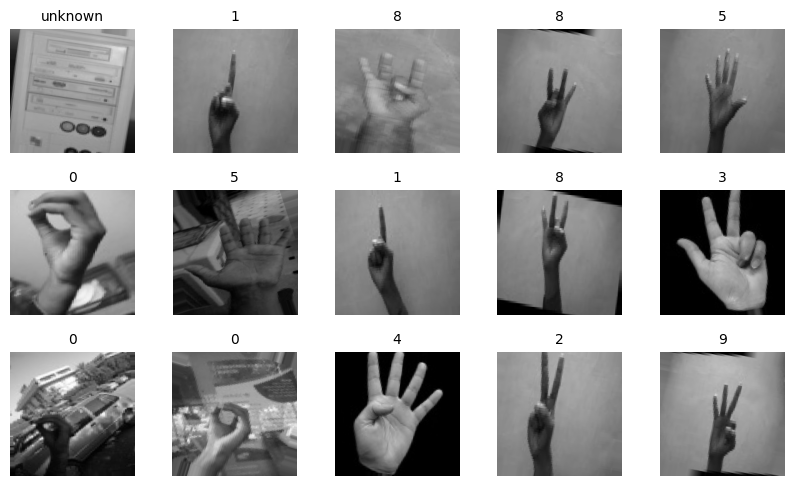

In [19]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize=(10, 10))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(labels[np.argmax(titles[i])].split('-')[-1], fontsize = 10)
    plt.axis("off")

## Training Model

In [20]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(11, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 11)                715       
                                                                 
Total params: 15895115 (60.64 MB)
Trainable params: 1180427 (4.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [22]:
optimizer = tf.optimizers.Nadam(learning_rate=1.0000e-04)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [23]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.92  and logs.get('val_accuracy') > 0.92):
            print("\nAkurasi telah mencapai > 92% !")
            self.model.stop_training = True

callbacks = myCallback()

hist = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    batch_size=128,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/100
207/207 [==============================] - 180s 818ms/step - loss: 1.8653 - accuracy: 0.3814 - val_loss: 1.4440 - val_accuracy: 0.6315
Epoch 2/100
207/207 [==============================] - 165s 795ms/step - loss: 1.2461 - accuracy: 0.6251 - val_loss: 1.0089 - val_accuracy: 0.7448
Epoch 3/100
207/207 [==============================] - 174s 841ms/step - loss: 1.0253 - accuracy: 0.6880 - val_loss: 0.8901 - val_accuracy: 0.7685
Epoch 4/100
207/207 [==============================] - 164s 792ms/step - loss: 0.8821 - accuracy: 0.7353 - val_loss: 0.7410 - val_accuracy: 0.8121
Epoch 5/100
207/207 [==============================] - 173s 837ms/step - loss: 0.7759 - accuracy: 0.7689 - val_loss: 0.6775 - val_accuracy: 0.8321
Epoch 6/100
207/207 [==============================] - 166s 801ms/step - loss: 0.7073 - accuracy: 0.7923 - val_loss: 0.5627 - val_accuracy: 0.8467
Epoch 7/100
207/207 [==============================] - 165s 794ms/step - loss: 0.6485 - accuracy: 0.8067 - val_loss: 0

## Plot Accuracy & Loss Model

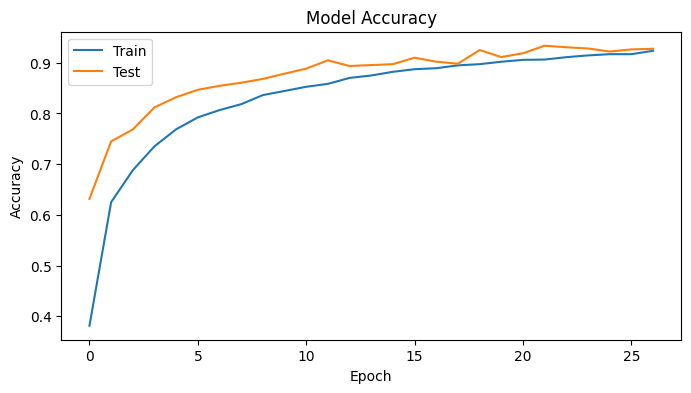

In [24]:
plt.figure(figsize=(8,4))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Test'])
plt.show()

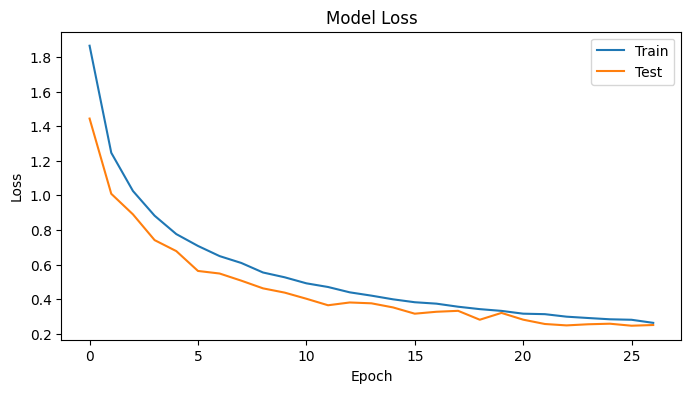

In [25]:
plt.figure(figsize=(8,4))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Test'])
plt.show()

## TF-Lite Model

In [27]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

63591060